In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
film_data = pd.read_csv('Amazon- Movies and Films.csv')
# Summary of the dataset
film_data.describe()
# Information about the dataset
film_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2108 non-null   int64  
 1   title          2108 non-null   object 
 2   Movie_Rating   2108 non-null   float64
 3   No_of_Ratings  2108 non-null   int64  
 4   Format         2108 non-null   object 
 5   ReleaseYear    2069 non-null   float64
 6   MPAA_Rating    1378 non-null   object 
 7   Directed_By    2043 non-null   object 
 8   Starring       2107 non-null   object 
 9   Price          1011 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 164.8+ KB


In [2]:
# Delete duplicate titles
duplicates_title = film_data[film_data.duplicated('title', keep=False)]
duplicates_title = duplicates_title.sort_values('title')
print(duplicates_title)

      Unnamed: 0                   title  Movie_Rating  No_of_Ratings  \
407          407   2001: A Space Odyssey           4.6           8641   
421          421   2001: A Space Odyssey           4.6           8641   
1079        1079                21 Grams           4.3            957   
1065        1065                21 Grams           4.3            957   
677          677  9/11: Minute by Minute           4.1            255   
...          ...                     ...           ...            ...   
308          308           Woman in Gold           4.8           8630   
691          691                       X           4.0           8240   
672          672                       X           4.0           8240   
1419        1428   X-Men: The Last Stand           4.6          10495   
1591        1600   X-Men: The Last Stand           4.6          10495   

           Format  ReleaseYear MPAA_Rating                  Directed_By  \
407   Prime Video       1970.0           G      

In [3]:
film_data = film_data.drop_duplicates('title', keep='first')


In [4]:
print(film_data.describe()) # 2108 -> 1870 distinct rows

        Unnamed: 0  Movie_Rating  No_of_Ratings  ReleaseYear       Price
count  1870.000000   1870.000000    1870.000000  1833.000000  916.000000
mean   1055.118717      4.483797    8208.656150  2008.404255    4.907041
std     621.813373      0.256117   16244.423267    14.720419    6.998871
min       0.000000      4.000000       1.000000  1931.000000    0.890000
25%     518.250000      4.300000     302.250000  2002.000000    3.590000
50%    1046.500000      4.500000    2063.000000  2013.000000    3.790000
75%    1605.000000      4.700000    7839.250000  2019.000000    3.990000
max    2116.000000      5.000000  142807.000000  2023.000000  119.990000


In [5]:
print(film_data.info())
print(film_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 1870 entries, 0 to 2107
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1870 non-null   int64  
 1   title          1870 non-null   object 
 2   Movie_Rating   1870 non-null   float64
 3   No_of_Ratings  1870 non-null   int64  
 4   Format         1870 non-null   object 
 5   ReleaseYear    1833 non-null   float64
 6   MPAA_Rating    1215 non-null   object 
 7   Directed_By    1810 non-null   object 
 8   Starring       1869 non-null   object 
 9   Price          916 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 160.7+ KB
None
Unnamed: 0         0
title              0
Movie_Rating       0
No_of_Ratings      0
Format             0
ReleaseYear       37
MPAA_Rating      655
Directed_By       60
Starring           1
Price            954
dtype: int64


In [6]:
print(film_data[film_data['ReleaseYear'].isnull()])
# We see that some of the rows have missing values in the ReleaseYear column have popular movies, so we can't drop it
# Fill it with median value
film_data['ReleaseYear'] = film_data['ReleaseYear'].fillna(film_data['ReleaseYear'].median())


      Unnamed: 0                                              title  \
305          305                              PAW Patrol: Moto Pups   
347          347  The Super Mario Bros. Movie (Blu-Ray + DVD + D...   
475          475                                     Season Of Fear   
553          553              First Emperor: The Man Who Made China   
570          570                                                Spy   
734          734  The Lord of the Rings: The Motion Picture Tril...   
800          800                                             Sirens   
807          807                                 Black Girl Erupted   
809          809                                 Bullet to the Head   
861          861                                       Dog Soldiers   
1010        1010  Spider-Man: Across The Spider-Verse - UHD/BD C...   
1027        1027                                        The Getaway   
1052        1052     Batman: The Complete Animated Series [Blu-ray]   
1114  

In [7]:
# print(film_data.isnull().sum()) # No missing values in ReleaseYear column
# print(film_data[film_data['Directed_By'].isnull() & (film_data['No_of_Ratings']>=100)].count())
# Drop rows with missing values in Directed_By column with condition that No_of_Ratings < 100
index_to_drop = film_data[film_data['Directed_By'].isnull() & (film_data['No_of_Ratings']<100)].index
film_data = film_data.drop(index_to_drop)
# Fill another missing values with 'Unknown'
film_data['Directed_By'] = film_data['Directed_By'].fillna('Unknown')
print(film_data.isnull().sum()) # No missing values in Directed_By column

Unnamed: 0         0
title              0
Movie_Rating       0
No_of_Ratings      0
Format             0
ReleaseYear        0
MPAA_Rating      629
Directed_By        0
Starring           1
Price            933
dtype: int64


In [8]:
# print(film_data[film_data['Starring'].isnull()]) # 1 row with missing value in Starring column
# With only 1 row missing value in Starring column and little No_of_Ratings, we can drop it
film_data = film_data.dropna(subset=['Starring'])
print(film_data.isnull().sum()) # No missing values in Starring column

Unnamed: 0         0
title              0
Movie_Rating       0
No_of_Ratings      0
Format             0
ReleaseYear        0
MPAA_Rating      628
Directed_By        0
Starring           0
Price            932
dtype: int64


In [9]:
missing_data = film_data[film_data['MPAA_Rating'].isnull()]
non_missing_data = film_data[film_data['MPAA_Rating'].notnull()]
print(missing_data['MPAA_Rating'])
print(non_missing_data['MPAA_Rating'])


3       NaN
21      NaN
28      NaN
45      NaN
58      NaN
       ... 
2098    NaN
2099    NaN
2101    NaN
2103    NaN
2104    NaN
Name: MPAA_Rating, Length: 628, dtype: object
0           R
1           R
2          PG
4          PG
5           R
        ...  
2100       PG
2102    PG-13
2105       PG
2106        R
2107    PG-13
Name: MPAA_Rating, Length: 1211, dtype: object


In [10]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

class CustomLabelEncoder(LabelEncoder):
    def transform(self, y):
        # Find labels in `y` that are not in `self.classes_`
        new_labels = np.setdiff1d(y, self.classes_)
        # If there are new labels, append them to `self.classes_`
        if len(new_labels)>0:
            self.classes_ = np.append(self.classes_, new_labels)
        # Call the `transform` method from the parent class
        return super().transform(y)
label_encoder = CustomLabelEncoder()
features = ['title']
label_encoder.fit(film_data[features].values.ravel())
print(label_encoder.classes_)


['#Unfit: The Psychology of Donald Trump' '10 Cloverfield Lane' '10 YEARS'
 ... 'xXx: Return of Xander Cage' 'xXx: State of the Union'
 '¿Quieres ser mi hijo?']


In [11]:
X_train = label_encoder.transform(non_missing_data[features].values.ravel())
X_train = X_train.reshape(-1, len(features))
y_train = non_missing_data['MPAA_Rating']

# Create a KNeighborsClassifier object
knn = KNeighborsClassifier(n_neighbors=4)
# Fit the classifier
knn.fit(X_train, y_train)

X_missing = label_encoder.transform(missing_data[features].values.ravel())
X_missing = X_missing.reshape(-1, len(features))

missing_data['MPAA_Rating'] = knn.predict(X_missing)

# Concatenate missing_data and non_missing_data
film_data = pd.concat([missing_data, non_missing_data], axis=0)
print(film_data.isnull().sum()) # No missing values in MPAA_Rating column

Unnamed: 0         0
title              0
Movie_Rating       0
No_of_Ratings      0
Format             0
ReleaseYear        0
MPAA_Rating        0
Directed_By        0
Starring           0
Price            932
dtype: int64


/tmp/ipykernel_54580/1324460948.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_data['MPAA_Rating'] = knn.predict(X_missing)


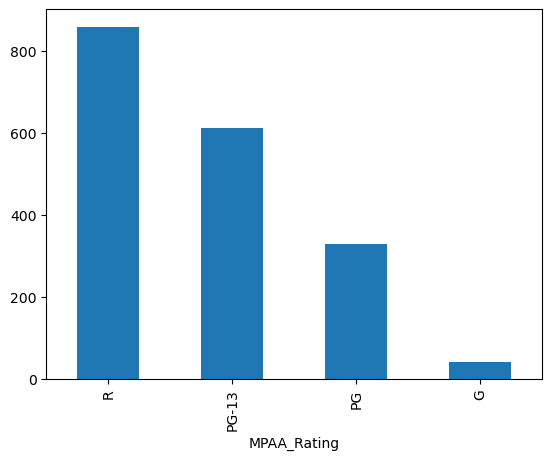

In [12]:
film_data['MPAA_Rating'].value_counts().plot(kind='bar')
plt.show()

In [13]:
print(film_data[film_data['title']=='You Asked to See the Monster'])

     Unnamed: 0                         title  Movie_Rating  No_of_Ratings  \
101         101  You Asked to See the Monster           4.0            551   

          Format  ReleaseYear MPAA_Rating    Directed_By    Starring  Price  
101  Prime Video       2023.0       PG-13  Thomas Leader  Gary Green    NaN  


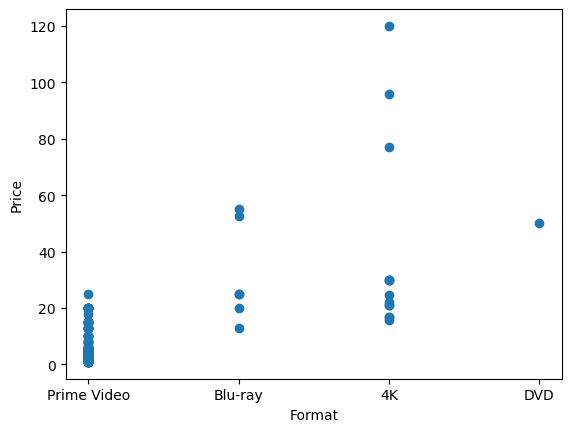

0.07551397816644347


In [14]:
plt.scatter(film_data['Format'], film_data['Price'])
plt.xlabel('Format')
plt.ylabel('Price')
plt.show()
print(film_data['ReleaseYear'].corr(film_data['Price']))

In [15]:
film_data['Price'] = film_data.groupby('Format')['Price'].transform(lambda x: x.fillna(x.mean()))
print(film_data.isnull().sum())
print(film_data.head())

Unnamed: 0       0
title            0
Movie_Rating     0
No_of_Ratings    0
Format           0
ReleaseYear      0
MPAA_Rating      0
Directed_By      0
Starring         0
Price            0
dtype: int64
    Unnamed: 0                                    title  Movie_Rating  \
3            3                                    Kelce           5.0   
21          21                                 Twilight           4.7   
28          28         Rock Dog 2: Rock Around the Park           4.3   
45          45                                 My Fault           4.7   
58          58  Love & Murder: Atlanta Playboy Part One           4.2   

    No_of_Ratings       Format  ReleaseYear MPAA_Rating          Directed_By  \
3             570  Prime Video       2023.0           R           Don Argott   
21          36270  Prime Video       2008.0       PG-13  Catherine Hardwicke   
28           2013  Prime Video       2021.0           G           Mark Baldo   
45            927  Prime Video       2

In [16]:
# After cleaning data, we will save it to a new csv file
film_data.to_csv('Amazon- Movies and Films_cleaned.csv',
                 index=False)


In [17]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [23]:
# Set default Seaborn style
import seaborn as sns
sns.set()
# Load the cleaned dataset
film_data = pd.read_csv('Amazon- Movies and Films_cleaned.csv')

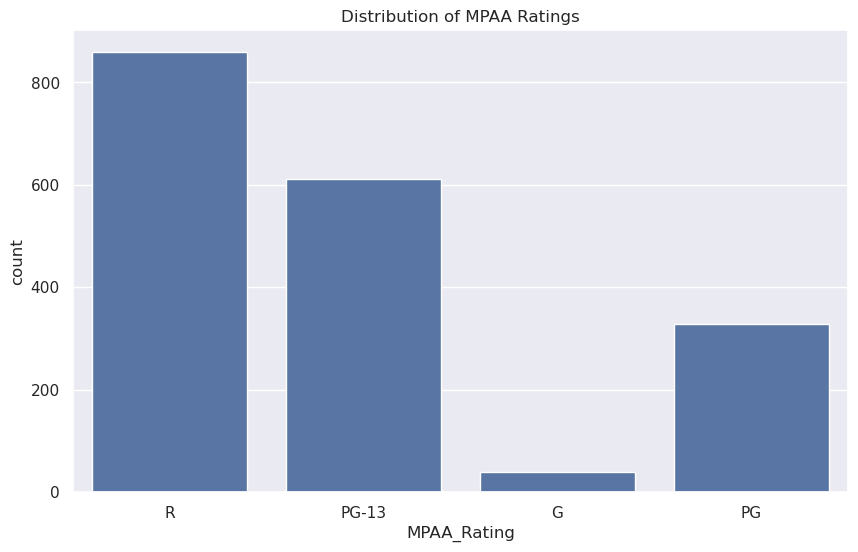

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MPAA_Rating', data=film_data)
plt.title('Distribution of MPAA Ratings')
plt.show()

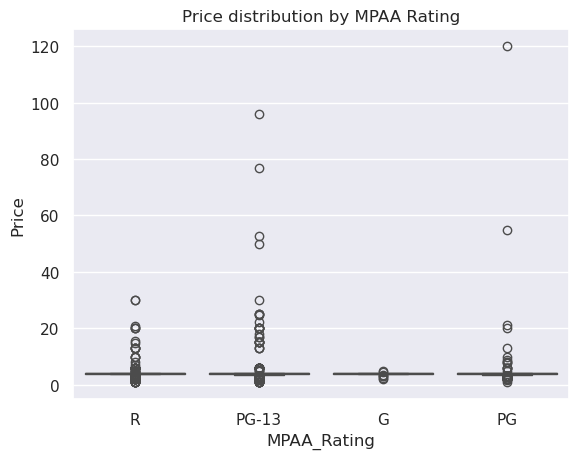

In [25]:
sns.boxplot(x='MPAA_Rating', y='Price', data=film_data)
plt.title('Price distribution by MPAA Rating')
plt.show()

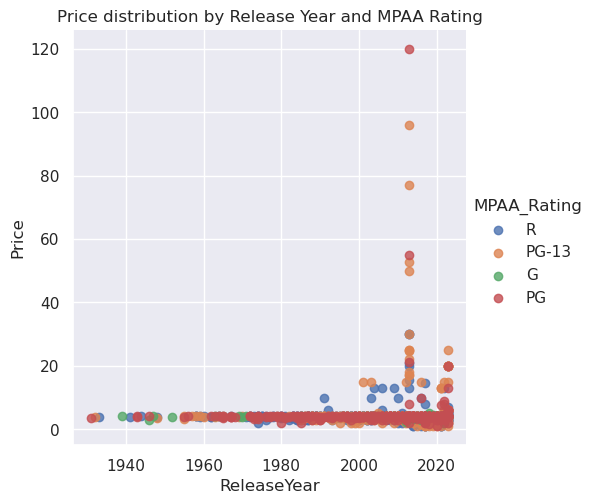

In [26]:
sns.lmplot(x='ReleaseYear', y='Price', data=film_data, fit_reg=False, hue='MPAA_Rating')
plt.title('Price distribution by Release Year and MPAA Rating')
plt.show()

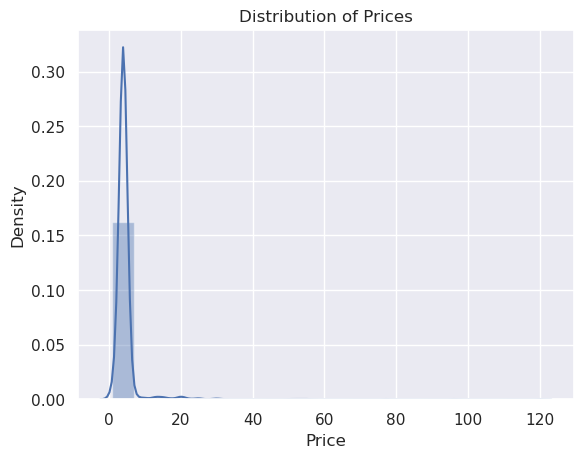

0.11601601653897159


In [ ]:
# Plot the distribution of prices
sns.distplot(film_data['Price'], bins=20)
plt.title('Distribution of Prices')
plt.show()

In [36]:
print(film_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1839 non-null   int64  
 1   title          1839 non-null   object 
 2   Movie_Rating   1839 non-null   float64
 3   No_of_Ratings  1839 non-null   int64  
 4   Format         1839 non-null   object 
 5   ReleaseYear    1839 non-null   float64
 6   MPAA_Rating    1839 non-null   object 
 7   Directed_By    1839 non-null   object 
 8   Starring       1839 non-null   object 
 9   Price          1839 non-null   float64
 10  Price_log      1839 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 158.2+ KB
None


In [43]:
# Check mutual information between float64 columns and Price
from sklearn.feature_selection import mutual_info_regression
# Select only int columns
f_columns = film_data.select_dtypes(include=['float64','int64']).columns
f_columns = f_columns.drop(['Unnamed: 0','Price', 'Price_log'])
def mi_score(series):
    return mutual_info_regression(series.values.reshape(-1, 1), film_data['Price'])

mi_scores = film_data[f_columns].apply(mi_score)
print(mi_scores)
# mi_scores = mi_scores.sort_values(ascending=False)

   Movie_Rating  No_of_Ratings  ReleaseYear
0      0.086849       0.155722     0.096433


In [ ]:
from scipy import stats

alpha = 0.05
# Test the normality of Price
print(stats.describe(film_data['Price']))
print(stats.normaltest(film_data['Price']))
print(stats.skewtest(film_data['Price']))
if stats.normaltest(film_data['Price']).pvalue < alpha:
    print('Price is not normally distributed')
else:
    print('Price is normally distributed')

DescribeResult(nobs=1839, minmax=(0.89, 119.99), mean=4.495657399216403, variance=24.129939311782508, skewness=14.593369242463135, kurtosis=272.6666784900252)
NormaltestResult(statistic=3540.949574235341, pvalue=0.0)
SkewtestResult(statistic=51.56714319894222, pvalue=0.0)
KurtosistestResult(statistic=29.694769178007228, pvalue=8.970636561279812e-194)
BinomTestResult(k=1, n=10, alternative='two-sided', statistic=0.1, pvalue=0.021484375)
